# Text Analytics HW1
Billy Yuan, Nikita Lakhotia, Stuti Madaan, Tyler Nicholas, Wenduo Wang

**I ONLY USED THE FIRST 2000 JOB DESCRIPTIONS FOR TESTING. IF THIS ALL LOOKS GOOD TO YOU, WE CAN RUN IT OVERNIGHT USING ALL OF THE WORDS. HOWEVER, THE ACCURACY DOESNT SEEM TO IMPROVE AFTER 2000 WORDS.**

### Import packages and set up data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import nltk as nltk

from sklearn.cross_validation import train_test_split

from collections import Counter

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.metrics import ConfusionMatrix
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams

WL = WordNetLemmatizer()

In [2]:
# Helper function to tokenize 
regex_tok = RegexpTokenizer(r"[\w]+")

In [3]:
# Read data
data = pd.read_csv("Train_rev1.csv")

In [4]:
# Create series of only the job descriptions
job_description = data["FullDescription"]

In [5]:
# Calculate 75th percentile salary and store this value
salary_75_percentile = np.percentile(data['SalaryNormalized'].tolist(),75)
print salary_75_percentile

42500.0


In [6]:
# Create target column
def over_75(salary):
    if salary >= salary_75_percentile:
        return "high"
    else:
        return "low"

data['target'] = data['SalaryNormalized'].map(over_75)

In [7]:
# Create list of tokenized words
tokenized = [regex_tok.tokenize(job_description[i].decode('utf-8')) for i in range(0,len(job_description))]

In [8]:
# Sample of how 'tokenized' looks
tokenized[1][:10]

[u'Stress',
 u'Engineer',
 u'Glasgow',
 u'Salary',
 u'to',
 u'We',
 u're',
 u'currently',
 u'looking',
 u'for']

In [9]:
def bigram_features(job_desc):
    text = nltk.word_tokenize(job_desc)
    bi_text = bigrams(text)
    pos_text = nltk.pos_tag(text)
    new_list = []
    for item in pos_text:
        item = item[1]
        new_list.append(item)
    bi_text = bigrams(new_list)
    bigram_counter = Counter(bi_text)
    token_counter = Counter(text)
    for item in bigram_counter:
        token_counter[item] = bigram_counter[item]
    return dict(token_counter)

In [10]:
def data_refine(job_desc, process_type):
    
    # Remove stop words
    if process_type == "remove_stop":
        no_stop_words_list = []
        for item in tokenized[:len(job_desc)]:
            stopwords = nltk.corpus.stopwords.words('english')
            content = [w for w in item if w.lower() not in stopwords]
            no_stop_words_list.append(Counter(content)) # word count dict of every job desc. without stopwords
        # Create feature list (list of tuples)
        no_stop_features = [(dict(no_stop_words_list[i]),data['target'][i]) for i in range(0,len(job_desc))]
        
        return no_stop_features
    
    elif process_type == "lem":
        # tokenized list after lemmatization. The freq. counts of this will be our features
        lem_list= []
        
        for item in tokenized[:len(job_desc)]: # debug
            lemmatized_words = []
            for word in item:
                lemmatized_words.append((WL.lemmatize(word)))
            lem_list.append(lemmatized_words)
        
        lem_features = [(dict(Counter(lem_list[i])),data['target'][i]) for i in range(0,len(job_desc))]
        
        return lem_features

    elif process_type == "bigram":
        bigram_list = []
        for i in range(0,len(job_desc)):
            bigram_list.append((bigram_features(" ".join(tokenized[i])),data['target'][i]))
        return bigram_list
    else:
        return [(dict(Counter(tokenized[i])),data['target'][i]) for i in range(0,len(tokenized))]
        

## Part A

### A1
What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they
appear?

PUTTING A POS TO EVERY WORD IN THE CORPUS TAKES A VERY LONG TIME

In [11]:
pos_token = [nltk.pos_tag(tokenized[i]) for i in range(0,len(tokenized[:1000]))]
a1_list = []
for item in pos_token:
    help_list = []
    for tup_1 in item:
        help_list.append(tup_1[1])
    a1_list.append(Counter(help_list))

most_common_pos = a1_list[0]

for i in range(1,len(a1_list)):
    most_common_pos += a1_list[i]

most_common_pos.most_common()[:5]

[('NN', 35127), ('NNP', 31586), ('IN', 22680), ('JJ', 17515), ('DT', 16934)]

### A2
Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the
theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform
stemming or lemmatization.

In [13]:
tokenized_all = []
# take out the [:10] once we submit the final hw. I put it here cuz it took too long to run
for item in tokenized[:2000]: 
    tokenized_all += item

In [15]:
top_100_words = Counter(tokenized_all).most_common()[:100]
word_list = [word[0] for word in top_100_words]
freq_list = [word[1] for word in top_100_words]
rank_list = [i for i in range(1,len(top_100_words)+1)]

for i in range(0,len(top_100_words)):
    print "{}: {}".format(word_list[i],freq_list[i])

and: 16166
to: 12624
the: 11223
a: 11193
of: 8753
in: 7618
for: 6993
with: 5055
is: 5005
be: 4164
will: 4122
care: 3999
are: 3706
you: 3198
an: 2874
The: 2804
or: 2778
on: 2717
as: 2520
have: 2496
experience: 2441
home: 2200
work: 2187
your: 2105
Manager: 2086
this: 2077
within: 1937
Nurse: 1872
Care: 1822
Home: 1788
working: 1716
role: 1691
nursing: 1680
looking: 1507
their: 1493
team: 1464
RGN: 1383
at: 1320
You: 1305
who: 1240
We: 1226
service: 1190
please: 1146
Nursing: 1124
all: 1113
apply: 1095
support: 1084
required: 1080
Registered: 1060
per: 1060
client: 1037
that: 1036
To: 1035
skills: 939
This: 938
If: 913
we: 910
s: 887
CV: 861
staff: 854
from: 848
must: 810
experienced: 808
RMN: 800
excellent: 791
our: 790
opportunity: 785
training: 777
hours: 768
elderly: 749
Recruitment: 747
people: 724
needs: 676
Job: 673
successful: 666
candidate: 647
qualified: 647
time: 643
part: 643
by: 635
A: 632
provide: 632
has: 622
full: 616
management: 616
high: 614
UK: 613
hour: 590
In: 586
qu

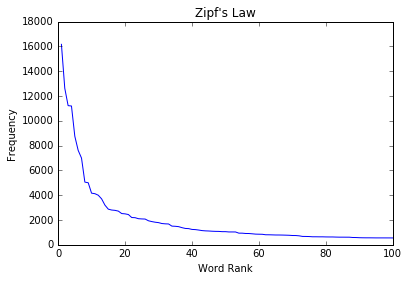

In [16]:
plt.plot(rank_list, freq_list)
plt.title("Zipf's Law")
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.show()

### A3
If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What is
their frequency?

In [18]:
lem_words = [WL.lemmatize(word) for word in tokenized_all[:2000]]
Counter(lem_words).most_common()[:10]

[(u'and', 84),
 (u'to', 60),
 (u'a', 54),
 (u'the', 38),
 (u'in', 28),
 (u'for', 24),
 (u'of', 24),
 (u'be', 22),
 (u'will', 20),
 (u'Engineering', 20)]

## Part B

We built a function that formats our feature set. The 4 choices are:

```python
process_type = "remove stop" # remove stop words
process_type = "lem" # lemmatize
process_type = "bigram" # convert to POS bigram
process_type = "none" # no additional processing
```

### B1
Create a classification model with all words and the bag-of-words approach. How accurate is the
model (show the confusion matrix)?

In [19]:
b1_features = data_refine(job_description[:2000],"none") # create features
train_set_b1, test_set_b1 = train_test_split(b1_features, test_size = 0.3, random_state=128) # create test/train
classifier_b1 = nltk.NaiveBayesClassifier.train(train_set_b1)

In [20]:
print("Accuracy with Bag of Words: {}".format(nltk.classify.accuracy(classifier_b1, test_set_b1)))

Accuracy with Bag of Words: 0.752447876238


In [21]:
# Build lists for predictions and actuals for confusion matrix
predict_b1 = [classifier_b1.classify(test_set_b1[i][0]) for i in range(0,len(test_set_b1))]
actual_b1 = [test_set_b1[i][1] for i in range(0,len(test_set_b1))] 

In [22]:
print ConfusionMatrix(predict_b1,actual_b1)

     |     h       |
     |     i     l |
     |     g     o |
     |     h     w |
-----+-------------+
high |<16574>16156 |
 low |  2022<38679>|
-----+-------------+
(row = reference; col = test)



### B2
Speculate before running the following analysis whether lemmatization would help improve the
accuracy of classification. Now create a classification model after lemmatization. Did the classification
accuracy increase relative to B1? Comment on your speculation versus the actual results you obtained.

In [23]:
b2_features = data_refine(job_description[:2000],"lem")
train_set_b2, test_set_b2 = train_test_split(b2_features, test_size = 0.3, random_state=128)
classifier_b2 = nltk.NaiveBayesClassifier.train(train_set_b2)

In [24]:
print("Accuracy with lemmatization: {}".format(nltk.classify.accuracy(classifier_b2, test_set_b2)))

Accuracy with lemmatization: 0.833333333333


### B3
Now speculate whether stopwords removal from the original data would help increase the accuracy
of the model. Take out the stopwords (but do not lemmatize), build a classification model and check the
accuracy, and compare with that in B1 & B2.

Also show the top 10 words (excluding stopwords) that are most indicative of (i) high salary, and (ii) low
salary.

In [25]:
b3_features = data_refine(job_description[:2000], "remove_stop")
train_set_b3, test_set_b3 = train_test_split(b3_features, test_size = 0.3, random_state=128)
classifier_b3 = nltk.NaiveBayesClassifier.train(train_set_b3)

In [26]:
print("Accuracy with stopwords removal: {}".format(nltk.classify.accuracy(classifier_b3, test_set_b3)))

Accuracy with stopwords removal: 0.806666666667


In [28]:
most_important_features_b3 = classifier_b3.show_most_informative_features(30)

# I don't know how to show top 10 for high and low
print most_important_features_b3

Most Informative Features
                   adhoc = 1                high : low    =     31.2 : 1.0
                   Refer = 1                high : low    =     24.9 : 1.0
                  RELIEF = 1                high : low    =     24.9 : 1.0
                   diary = 1                high : low    =     24.9 : 1.0
             leadingedge = 1                high : low    =     24.9 : 1.0
              maximising = 1                high : low    =     24.9 : 1.0
           Practitioners = 3                high : low    =     24.7 : 1.0
           Practitioners = 2                high : low    =     24.7 : 1.0
                 Michael = 1                high : low    =     22.3 : 1.0
           organisations = 1                high : low    =     20.4 : 1.0
               overnight = 1                high : low    =     20.4 : 1.0
                    Dave = 1                high : low    =     20.4 : 1.0
                Langford = 1                high : low    =     20.4 : 1.0

### B4
Use the job descriptions without lemmatiztion and stopword removal. Add parts-of-speech bigrams
to the bag-of-words, and run a new classification model. Does the accuracy increase over the results in
B1?

In [29]:
b4_features = data_refine(job_description[:2000], "bigram")
train_set_b4, test_set_b4 = train_test_split(b4_features, test_size = 0.3, random_state=128)
classifier_b4 = nltk.NaiveBayesClassifier.train(train_set_b4)

In [30]:
print("Accuracy with adding POS bigrams: {}".format(nltk.classify.accuracy(classifier_b4, test_set_b4)))

Accuracy with adding POS bigrams: 0.86
